In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Gaurav Kumar\Desktop\DATA TRAINED\Internship Project\DSData-master\loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# there are lots of null values present so we need to addres the numerical value.

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# we can see the Applicant income has std higher than mean similalry in coapllicant income too.

# Also the loan amount value in between min to 0 has very less nos and similarly in range for 75% to max has very less values

In [11]:
#filling of null values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].dropna().mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encoding

In [14]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [15]:
# Import label encoder to encode the vinary variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = le.fit_transform(df[col])

In [16]:
# we drop the loan id column becoz it ha no use
df=df.drop('Loan_ID', axis=1)

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [19]:
df['Property_Area'].unique()

array([2, 0, 1])

# Data Visualization

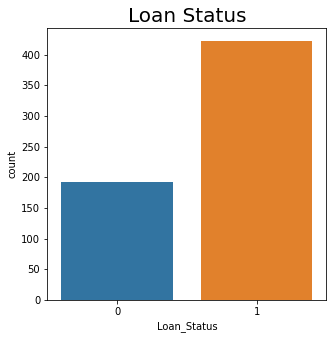

1    422
0    192
Name: Loan_Status, dtype: int64

In [20]:
plt.figure(figsize=(5,5))
plt.title('Loan Status',fontsize=20)
sns.countplot(x='Loan_Status',data=df)
plt.show()
df['Loan_Status'].value_counts()

In [21]:
# We can conclude from the visualization the data set imbalanced.

Text(0.5, 1.0, 'Loan_Status acceptance')

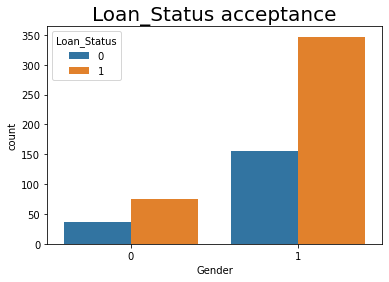

In [22]:
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])
plt.title('Loan_Status acceptance',fontsize= 20)

In [23]:
# Married Male has a higher loan acceptance than Female

C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gaurav Kumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\G

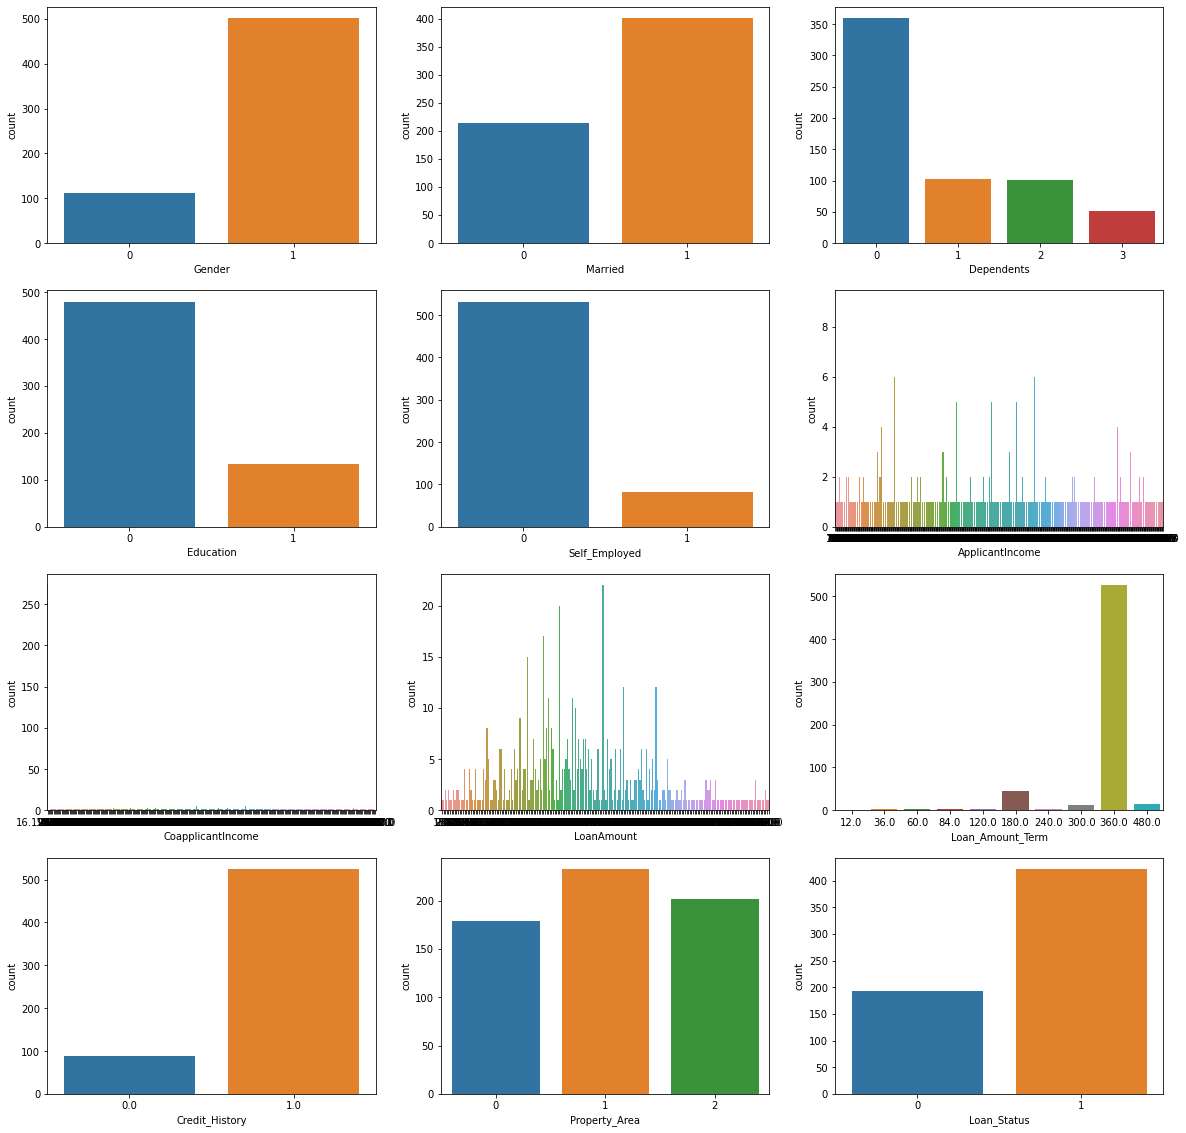

In [24]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber += 1
plt.show()

from the graph we can come to following conclusion.

1)Male nos are higher than female

2)Married People are higher in nos.

3)Dependent people are less in nos.

4)People having credit history are higher in nos than people having no credit history



# Correlation

<AxesSubplot:>

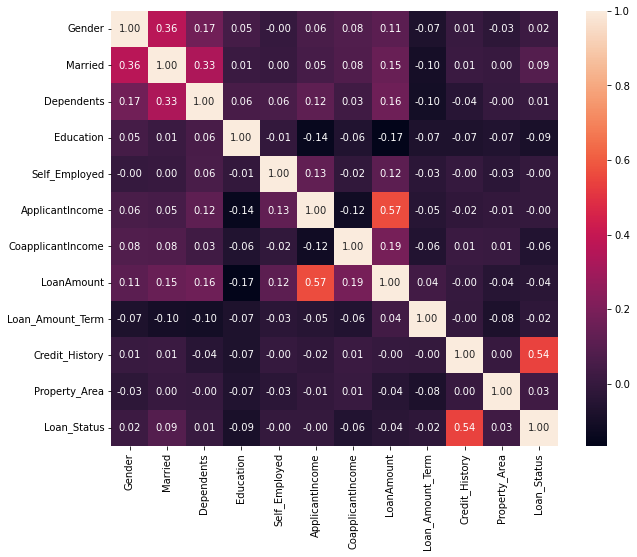

In [25]:
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,fmt='.2f',annot=True,annot_kws={'size':10})

1) Credit history has a relation with Loan status while rest columns does not have  high correlation with Loan Status

2) Applicant Income has also high correlaion with Loan Amount but it is not the target variable. 

# Resampling

In [27]:
# To balance the dataset we are going for oversampling as we do not want to lose data by undersampling

from imblearn.over_sampling import RandomOverSampler
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']
ros = RandomOverSampler(random_state=42)
ros.fit(X, y)

RandomOverSampler(random_state=42)

In [28]:
X_ros, y_ros = ros.fit_resample(X, y)
y_ros.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

 over sampling is done becoz of imbalanced data. As the data set low we cannot reduce yes so thus we match the yes nos with no nos.

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros,test_size=0.3,random_state=32)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,criterion = 'entropy',random_state =7)
svc = SVC()
lr = LogisticRegression()

# Logitic Regression¶

In [37]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
lr_ypred = lr.predict(X_test)

In [39]:
print("Accuracy: ", accuracy_score(y_test, lr_ypred))
print(classification_report(y_test, lr_ypred))

Accuracy:  0.7440944881889764
              precision    recall  f1-score   support

           0       0.85      0.57      0.68       122
           1       0.69      0.91      0.79       132

    accuracy                           0.74       254
   macro avg       0.77      0.74      0.73       254
weighted avg       0.77      0.74      0.74       254



# KNeighbors Classifier

In [40]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_ypred=knn.predict(X_test)

In [41]:
print("Accuracy: ", accuracy_score(y_test, knn_ypred))
print(classification_report(y_test, knn_ypred))

Accuracy:  0.594488188976378
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       122
           1       0.61      0.59      0.60       132

    accuracy                           0.59       254
   macro avg       0.59      0.59      0.59       254
weighted avg       0.60      0.59      0.59       254



# SVC

In [42]:
svc=SVC()
svc.fit(X_train,y_train)
svc_ypred=svc.predict(X_test)

In [43]:
print("Accuracy: ", accuracy_score(y_test, svc_ypred))
print(classification_report(y_test, svc_ypred))

Accuracy:  0.5748031496062992
              precision    recall  f1-score   support

           0       0.54      0.70      0.61       122
           1       0.62      0.46      0.53       132

    accuracy                           0.57       254
   macro avg       0.58      0.58      0.57       254
weighted avg       0.59      0.57      0.57       254



# Random Forest Classifier

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_ypred=rfc.predict(X_test)

In [45]:
print("Accuracy: ", accuracy_score(y_test, rfc_ypred))
print(classification_report(y_test, rfc_ypred))

Accuracy:  0.889763779527559
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       122
           1       0.89      0.90      0.89       132

    accuracy                           0.89       254
   macro avg       0.89      0.89      0.89       254
weighted avg       0.89      0.89      0.89       254



We get the best result through Random forest classifier with the Accuracy score of 89%.

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
for i in range(3,8):
    cv=cross_val_score(rfc,X,y,cv=i)
    print(rfc,cv.mean())

RandomForestClassifier() 0.7915431213135662
RandomForestClassifier() 0.7834224598930482
RandomForestClassifier() 0.7801412768226043
RandomForestClassifier() 0.7899137001078748
RandomForestClassifier() 0.7866845797880282


# Hyperparameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [78]:
params={'max_depth':[3,1,5],'n_estimators':[5,20,100]}

In [79]:
rfc_tuned = RandomForestClassifier()

In [80]:
gv=GridSearchCV(rfc_tuned,params)
ht=gv.fit(X_train,y_train)

In [81]:
ht.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [82]:
rf_best = RandomForestClassifier(max_depth=5, n_estimators=100)

In [83]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [84]:
rf_best_ypred = rf_best.predict(X_test)

In [85]:
print('Random Forest Classifier:')
print('Accuracy score:', accuracy_score(y_test, rf_best_ypred))

Random Forest Classifier:
Accuracy score: 0.7519685039370079
